<a href="https://colab.research.google.com/github/NguyenSLam/Artificial-Intelligence/blob/main/Training_CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
from keras.utils import to_categorical
# Chuyển đổi các nhãn ở đầu ra thành định dạng one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation

In [5]:
model = Sequential()
# Define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10, activation='softmax'))

In [6]:
from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 64, epochs = 20, verbose = 1)

Epoch 1/20
782/782 [==============================] - 15s 7ms/step - loss: 1.3879 - accuracy: 0.4980
Epoch 2/20
782/782 [==============================] - 9s 12ms/step - loss: 0.9386 - accuracy: 0.6723
Epoch 3/20
782/782 [==============================] - 5s 7ms/step - loss: 0.7546 - accuracy: 0.7357
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.6293 - accuracy: 0.7793
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.5260 - accuracy: 0.8152
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4325 - accuracy: 0.8495
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.3514 - accuracy: 0.8779
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.2822 - accuracy: 0.9016
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 0.2198 - accuracy: 0.9226
Epoch 10/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1764 - accuracy: 0.93

1/1 [==============================] - 0s 22ms/step


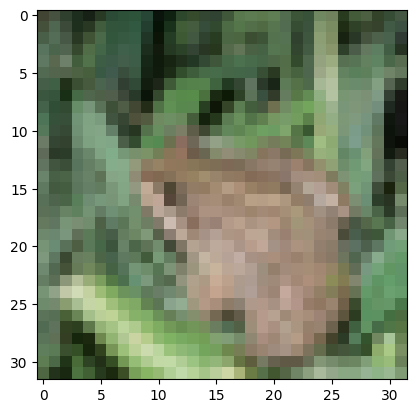

Label:  Mèo


In [13]:
# Test mô hình
X = x_test
y = y_test

i = 3 #Test hình thứ i
img = X[i+1].reshape(1, 32, 32, 3)
matrix = np.argmax(model.predict(img), axis=-1)

plt.imshow(X[i+1].reshape(32,32,3))
plt.show()
class_names = ["Máy bay", "Ô tô", "Chim", "Mèo", "Nai", "Chó", "Ếch", "Ngựa", "Tàu thủy", "Xe tải"]
temp1 = matrix[0]
print("Label: ", class_names[temp1])

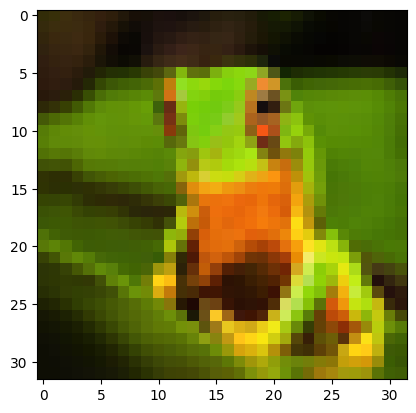

1/1 [==============================] - 0s 22ms/step
6
Label:  Ếch


In [15]:
from PIL import Image

# Mở ảnh
img = Image.open('/content/frog.jpg')

# Resize ảnh về kích thước mong muốn
img = img.resize((32, 32))

# Chuyển đổi ảnh sang numpy array và chuẩn hóa
img = np.asarray(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32') / 255.0

plt.imshow(img.reshape(32,32,3))
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)

class_names = ["Máy bay", "Ô tô", "Chim", "Mèo", "Nai", "Chó", "Ếch", "Ngựa", "Tàu thủy", "Xe tải","Sóc"]
temp1 = matrix[0]
print(temp1)
print("Label: ", class_names[temp1])